# Analisando os Sentimentos na Discografia de Liam Payne

A análise de sentimentos e inferência de emoções em músicas são técnicas que buscam identificar e interpretar as emoções expressas nas letras das canções. Esse tipo de análise utiliza algoritmos e modelos de aprendizado de máquina, como o Processamento de Linguagem Natural (PLN), para avaliar as palavras e frases contidas nas letras, classificando-as em polaridades como positivo, negativo ou neutro.

As letras de músicas são ricas em emoção e podem refletir uma ampla gama de sentimentos, como amor, tristeza, alegria, raiva e nostalgia, logo, a análise de sentimentos permite que artistas, produtores e ouvintes compreendam melhor como a música pode impactar as emoções humanas e a percepção do público. Com o avanço das tecnologias de Inteligência Artificial (IA) e PLN, a análise de sentimento em músicas está se tornando cada vez mais sofisticada, permitindo uma compreensão mais profunda e complexa das emoções humanas expressas através da arte musical.

## Importando Bibliotecas

In [1]:
# Importando bibliotecas de manipulação e análise de dados
import pandas as pd  # Usado para manipulação de tabelas e dataframes
import numpy as np   # Usado para operações matemáticas e arrays numéricos

# Biblioteca para processamento de imagens
from PIL import Image  # Usado para abrir, manipular e processar imagens

# Biblioteca para geração de nuvem de palavras (wordcloud)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# STOPWORDS: remove palavras irrelevantes
# ImageColorGenerator: usa as cores de uma imagem para colorir a wordcloud

# Biblioteca de NLP (Processamento de Linguagem Natural)
from nltk.tokenize import word_tokenize  # Quebra textos em palavras (tokens)

# Biblioteca para visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações
from matplotlib.pyplot import figure  # Ajuste de tamanho de figuras
%matplotlib inline

# Baixando recursos da biblioteca NLTK
import nltk
nltk.download('punkt_tab')  # Tokenizador de pontuação/tabulação
nltk.download('vader_lexicon')  # Léxico para análise de sentimentos com VADER (análise de sentimentos)

# Biblioteca de visualização estatística
import seaborn as sns  # Estilização e gráficos estatísticos avançados

# Instalando bibliotecas com ! (comando de terminal usado no Jupyter)
!pip install shapely  # manipulação de formas geométricas
!pip install descartes       # Necessária para exibir formas geométricas com matplotlib
!pip install pyplutchik      # Biblioteca para visualização de emoções com o modelo de Plutchik

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Carregando arquivo com as músicas da Banda

O arquivo CSV foi gerado no notebook *Lyrics.ipynb*, contendo informações detalhadas sobre as músicas do famoso cantor. O *dataset* inclui dados como título das faixas, álbum e ano de lançamento através da API *Genius*. A exportação para CSV permite uma fácil visualização, análise e compartilhamento dos dados.

In [4]:
# Leitura do Arquivo
df=pd.read_csv("LiamPayneLyrics.csv")

# Remove a coluna 'release_date'
df = df.drop(columns=['release_date'])

# Eliminando músicas não oficiais
df = df.drop(index=[7,21,22,26,29,30])

# Reseta o índice, se necessário
df.reset_index(drop=True, inplace=True)

# Visualização do Dataframe
df

title  \
0              Strip That Down   
1                      For You   
2                     Familiar   
3                    Both Ways   
4                Bedroom Floor   
5                  Stack It Up   
6                   First Time   
7   All I Want (For Christmas)   
8                 Live Forever   
9                   Rude Hours   
10                Depend on It   
11                    Remember   
12                        Slow   
13                   Teardrops   
14               Home with You   
15           Tell Your Friends   
16            Heart Meet Break   
17                     Weekend   
18                  Say It All   
19              Hips Don’t Lie   
20                  Hurting Me   
21          What Have You Done   
22                     Trouble   
23                 Nobody Else   
24                        Down   

                                               lyrics       Album  \
0    quavo huncho quavo  liam payne know takin tim...         LP1   
1    rita eyes alive inside beautiful something un...         LP1   
2    balvin balvin liam payne  liam payne balvin s...         LP1   
3    girl like ways like taste couple more call fo...         LP1   
4    baby heard talking lately telling friends muc...         LP1   
5    liam payne wanna broke wanna livin tryna club...         LP1   
6    french montana montana know hear haan  liam p...  First Time   
7    tell wrong singing christmas songs instead sh...         LP1   
8    jaded faded self medicated know waiting yeah ...         LP1   
9    meet parking yeah might idea prob your quit n...         LP1   
10   used loving touching kissing like lives depen...  First Time   
11   love someone love someone much makes hate the...         LP1   
12   though done turn blind tell goodnight cause m...  First Time   
13   teardrops fallin down face cause know love wh...        LP2*   
14   yeah  walk walk dragging talked smoke spill a...  First Time   
15   defend reputation girl even make sound hold d...         LP1   
16   heart meet break lips meet drink rock meet bo...         LP1   
17   yeah  said wrong meant right would know yeah ...         LP1   
18   yeah  want want girl know want know what want...         LP1   
19   like shining yeah eyes rocking back forth roc...         LP1   
20   know play heart  baby last night found receip...         LP1   
21   little less high used still little uncertain ...         NaN   
22   never wanted tired wasted wasting life basis ...         LP1   
23   yeah yeah  wanna that your body hella yeah wa...         LP1   
24   take time take girl know intoxicated touch mo...         LP1   

    release_year  Word Count  
0           2017         354  
1           2018         166  
2           2018         233  
3           2019         232  
4           2017         194  
5           2019         181  
6           2018         230  
7           2019         123  
8           2019         200  
9           2019         189  
10          2018         130  
11          2019         168  
12          2018         154  
13          2024         146  
14          2018         149  
15          2019         212  
16          2019         188  
17          2019         180  
18          2019         195  
19          2019         137  
20          2019         158  
21          2024          96  
22          2019         144  
23          2019         159  
24          2019         108

In [5]:
# Eliminando músicas não oficiais
df = df.drop(index=[21])

# Reseta o índice, se necessário
df.reset_index(drop=True, inplace=True)

df


title  \
0              Strip That Down   
1                      For You   
2                     Familiar   
3                    Both Ways   
4                Bedroom Floor   
5                  Stack It Up   
6                   First Time   
7   All I Want (For Christmas)   
8                 Live Forever   
9                   Rude Hours   
10                Depend on It   
11                    Remember   
12                        Slow   
13                   Teardrops   
14               Home with You   
15           Tell Your Friends   
16            Heart Meet Break   
17                     Weekend   
18                  Say It All   
19              Hips Don’t Lie   
20                  Hurting Me   
21                     Trouble   
22                 Nobody Else   
23                        Down   

                                               lyrics       Album  \
0    quavo huncho quavo  liam payne know takin tim...         LP1   
1    rita eyes alive inside beautiful something un...         LP1   
2    balvin balvin liam payne  liam payne balvin s...         LP1   
3    girl like ways like taste couple more call fo...         LP1   
4    baby heard talking lately telling friends muc...         LP1   
5    liam payne wanna broke wanna livin tryna club...         LP1   
6    french montana montana know hear haan  liam p...  First Time   
7    tell wrong singing christmas songs instead sh...         LP1   
8    jaded faded self medicated know waiting yeah ...         LP1   
9    meet parking yeah might idea prob your quit n...         LP1   
10   used loving touching kissing like lives depen...  First Time   
11   love someone love someone much makes hate the...         LP1   
12   though done turn blind tell goodnight cause m...  First Time   
13   teardrops fallin down face cause know love wh...        LP2*   
14   yeah  walk walk dragging talked smoke spill a...  First Time   
15   defend reputation girl even make sound hold d...         LP1   
16   heart meet break lips meet drink rock meet bo...         LP1   
17   yeah  said wrong meant right would know yeah ...         LP1   
18   yeah  want want girl know want know what want...         LP1   
19   like shining yeah eyes rocking back forth roc...         LP1   
20   know play heart  baby last night found receip...         LP1   
21   never wanted tired wasted wasting life basis ...         LP1   
22   yeah yeah  wanna that your body hella yeah wa...         LP1   
23   take time take girl know intoxicated touch mo...         LP1   

    release_year  Word Count  
0           2017         354  
1           2018         166  
2           2018         233  
3           2019         232  
4           2017         194  
5           2019         181  
6           2018         230  
7           2019         123  
8           2019         200  
9           2019         189  
10          2018         130  
11          2019         168  
12          2018         154  
13          2024         146  
14          2018         149  
15          2019         212  
16          2019         188  
17          2019         180  
18          2019         195  
19          2019         137  
20          2019         158  
21          2019         144  
22          2019         159  
23          2019         108

In [6]:
# Lista de palavras indesejadas presentes na discografia e não identificadas na etapa de tokenização
indesejadas = ['liam','payne','na','yeah']

# Remove as palavras indesejadas, e salva de volta como um texto longo
df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 3931 palavras no dataset de letra.
Existem 776 palavras únicas no dataset de letras.


## Análise da Discografia
Primeiramente, será realizada uma análise exploratória do dataset como um todo, visando compreender sua estrutura, distribuição e características principais. Essa etapa é essencial para identificar padrões, possíveis inconsistências e *insights* iniciais sobre os dados. Essa análise preliminar ajudará a direcionar investigações mais específicas e a garantir a qualidade dos dados antes de aprofundar o estudo.

### Analisando o Dataset

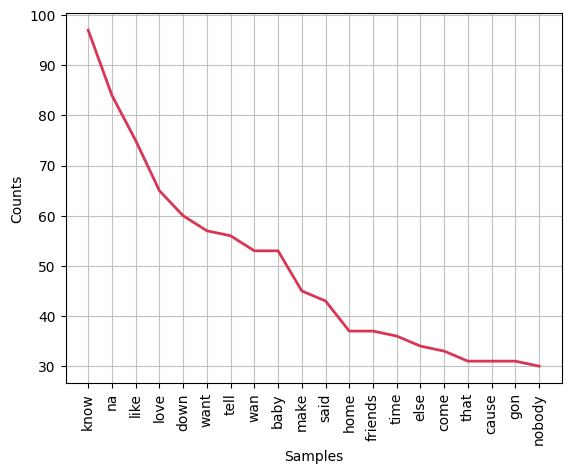

In [7]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Resultado do Gráfico</strong><br>
    Top 20 palavras mais frequentes na discografia do cantor.
</div>

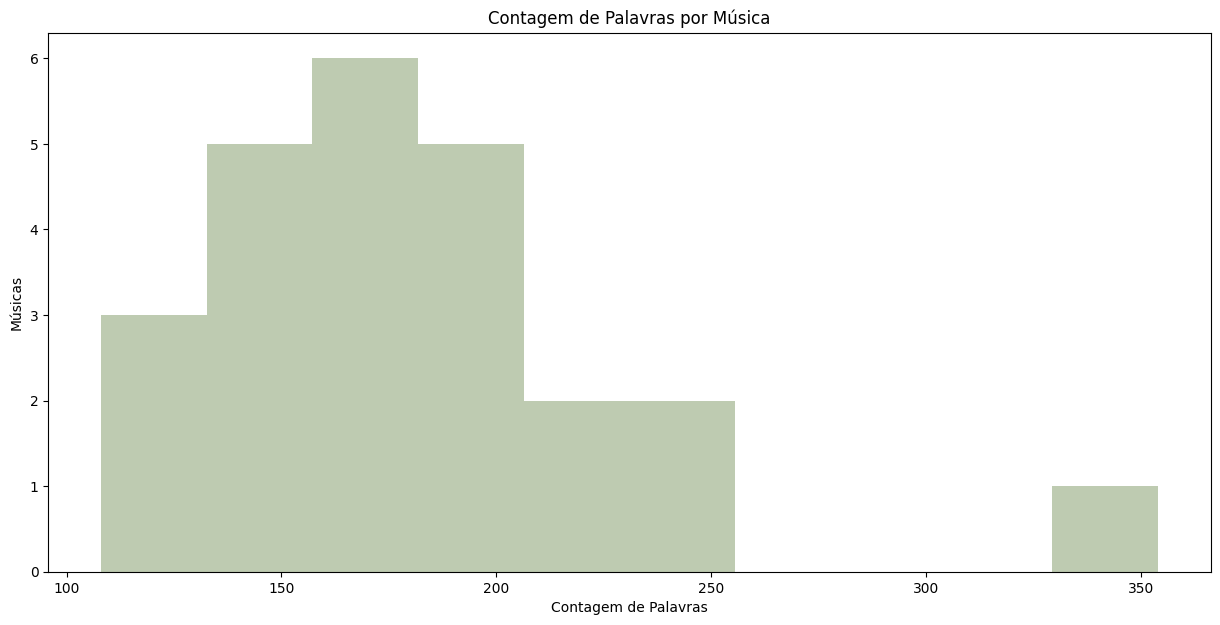

In [8]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    O resultado é um histograma que representa a distribuição da contagem de palavras das músicas. Cada barra no histograma mostra quantas músicas caem dentro de cada intervalo de contagem de palavras. Isso permite visualizar rapidamente como as músicas se distribuem em relação à sua contagem de palavras, identificando padrões, como se a maioria das músicas tende a ser mais curtas ou mais longas.
</div>

### Análise de Sentimento da Discografia

A análise de sentimentos é uma técnica da área de Processamento de Linguagem Natural (PLN) que tem como objetivo identificar e classificar emoções expressas em textos, como opiniões, comentários, avaliações e postagens em redes sociais. Um dos principais aspectos dessa análise é a **polaridade**, que indica a direção do sentimento expresso: **positivo**, **negativo** ou **neutro**.

**Polaridade Positiva** refere-se a textos que expressam sentimentos favoráveis, elogios ou apreciações. Exemplos incluem palavras como "ótimo", "maravilhoso", "excelente" e "gostei". Comentários positivos geralmente indicam satisfação com um produto, serviço ou experiência.

**Polaridade Negativa**, por sua vez, é associada a emoções negativas, críticas ou insatisfações. Termos como "horrível", "péssimo", "não gostei" e "decepcionante" são indicadores comuns. Esse tipo de polaridade ajuda a identificar pontos de melhoria a partir de feedbacks negativos dos usuários.

Já a **Polaridade Neutra** está presente em textos que não expressam uma opinião clara ou não possuem carga emocional significativa. Comentários como "o produto chegou ontem", "estava chovendo" ou "fiz a compra hoje" são exemplos de frases informativas, sem julgamento emocional.

Em aplicações práticas, a identificação correta da polaridade é essencial para empresas e pesquisadores compreenderem melhor o comportamento e a percepção dos usuários. Isso pode influenciar estratégias de marketing, aprimoramento de produtos e até mesmo monitoramento de reputação online.

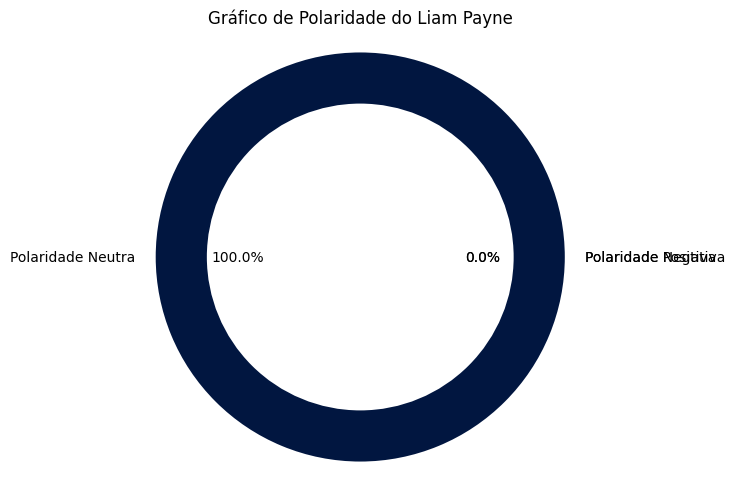

In [9]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do Liam Payne')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta apenas polaridade neutra, mostrando que suas composições não tem alto teor de intensidade.
</div>

### Nuvem de Palavras
A **nuvem de palavras** (ou *word cloud*, em inglês) é uma técnica visual utilizada para representar a frequência ou relevância de palavras em um determinado conjunto de dados textuais. Nesse tipo de visualização, quanto mais uma palavra aparece em um texto ou conjunto de textos, maior será o seu destaque na nuvem — normalmente por meio de um tamanho de fonte mais elevado.

Essa ferramenta é muito usada em análises exploratórias de dados textuais, especialmente em áreas como análise de sentimentos, mineração de texto, marketing digital, pesquisa acadêmica, entre outras. Ela permite uma compreensão rápida dos termos mais recorrentes em conteúdos como comentários de usuários, postagens em redes sociais, discursos políticos, letras de músicas ou avaliações de produtos.

A construção de uma nuvem de palavras geralmente envolve etapas de pré-processamento do texto, como:
- **Remoção de stopwords** (palavras comuns como “de”, “o”, “e”, que não agregam valor semântico relevante);
- **Lematização ou stemming** (redução de palavras à sua forma base);
- **Tratamento de pontuação e acentuação**.

Embora seja uma técnica simples, a nuvem de palavras oferece uma forma intuitiva e visual de identificar temas recorrentes, tendências e padrões de linguagem.

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count'], dtype='object')


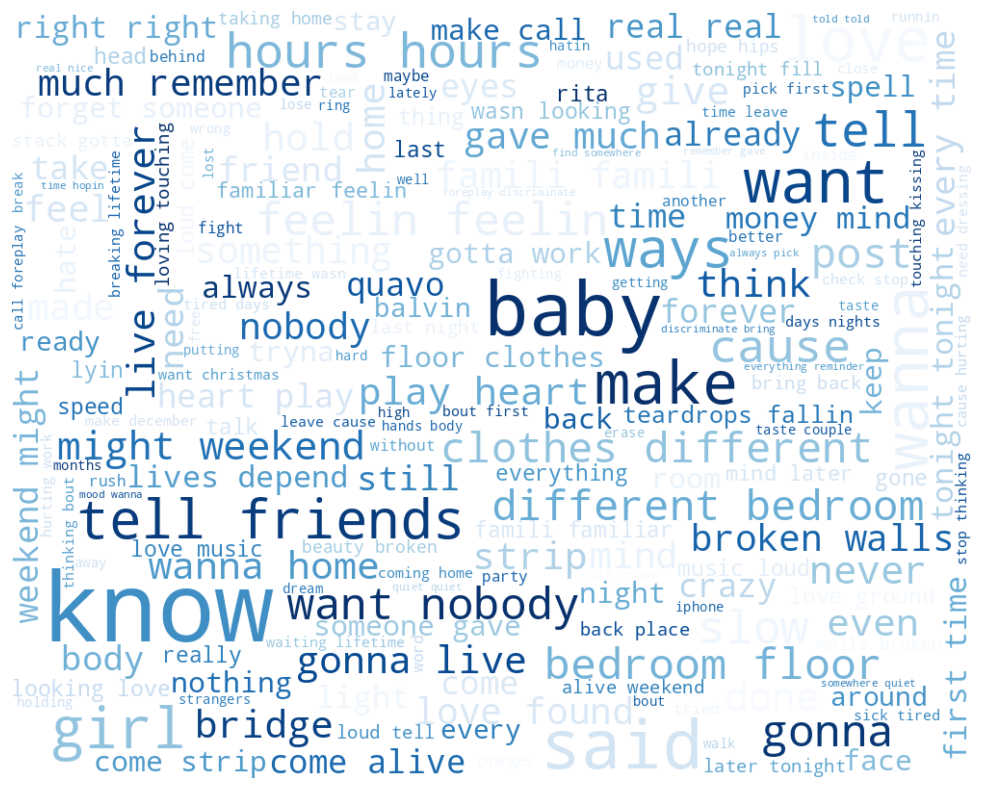

In [10]:
# Exibir os nomes das colunas do DataFrame
print(df.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df['lyrics'] = df['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

## Análise NRC para Inferência de Emoções
O arquivo NRC (National Research Council) é um recurso amplamente utilizado na análise de sentimentos, especialmente no contexto de processamento de linguagem natural (PLN) e mineração de texto. O NRC desenvolveu um léxico de sentimentos que categoriza palavras em diferentes emoções, permitindo que pesquisadores e desenvolvedores analisem letras de músicas, resenhas e outros textos em relação a sentimentos específicos.

### Estrutura do Arquivo NRC
O léxico do NRC é estruturado em várias colunas, onde as palavras são associadas a diferentes emoções e sentimentos, incluindo: Alegria, Tristeza, Medo,
Raiva, Surpresa, Desprezo, Confiança e Antipatia. Cada palavra no léxico é marcada como presente ou ausente em relação a essas emoções, permitindo que os usuários quantifiquem e analisem a presença de sentimentos em um texto.

### Aplicações na Análise de Músicas
Identificação de Emoções: Ao aplicar o léxico NRC às letras de músicas, é possível identificar quais emoções são mais proeminentes em uma canção. Por exemplo, uma letra pode ser classificada como predominantemente alegre, triste ou reflexiva.

**Comparação Entre Músicas:** O NRC permite a comparação de diferentes músicas ou álbuns, facilitando a análise de como os sentimentos evoluem ao longo do tempo ou entre diferentes artistas. Essa comparação pode revelar como as temáticas abordadas nas letras mudam conforme a carreira de um artista avança.

**Análise de Tendências:** Ao analisar um conjunto de músicas (por exemplo, todas as músicas lançadas em um determinado ano), os pesquisadores podem identificar tendências emocionais na música popular. Isso pode fornecer insights sobre a cultura e os sentimentos coletivos de uma sociedade em um período específico.

**Desenvolvimento de Recomendação:** O entendimento dos sentimentos nas músicas pode ajudar a criar sistemas de recomendação mais personalizados, sugerindo músicas com base no estado emocional do ouvinte.

O uso do arquivo NRC na análise de letras de músicas é uma ferramenta poderosa para compreender as emoções expressas na música. Com a capacidade de quantificar sentimentos, pesquisadores e desenvolvedores podem explorar a rica tapeçaria emocional das letras e como elas ressoam com os ouvintes. Essa análise não apenas enriquece nossa compreensão da música como arte, mas também nos oferece uma janela para as emoções humanas e a cultura contemporânea.

In [11]:
#Biblioteca para usar o NRC alinhado ao NLTK
from collections import defaultdict

# Carregar o lexicon NRC
nrc = pd.read_csv("NRC.tsv", sep='\t', names=['word', 'sentiment', 'association'])
nrc = nrc[nrc['association'] == 1]

# Definir emoções (exclui 'positive' e 'negative')
emotion_sentiments = {
    'anger', 'anticipation', 'disgust', 'fear',
    'joy', 'sadness', 'surprise', 'trust'
}

# Dicionário: palavra -> lista de emoções
nrc_dict = defaultdict(list)
for _, row in nrc.iterrows():
    if row['sentiment'] in emotion_sentiments:
        nrc_dict[row['word']].append(row['sentiment'])

# Emoções positivas e negativas para score
positive = {'joy', 'trust', 'anticipation', 'surprise'}
negative = {'anger', 'fear', 'disgust', 'sadness'}

# Função de análise
def analyze_text(text):
    tokens = word_tokenize(text.lower())
    sentiments_count = defaultdict(int)

    for token in tokens:
        for sentiment in nrc_dict.get(token, []):
            sentiments_count[sentiment] += 1

    score = sum(sentiments_count[s] for s in positive) - \
            sum(sentiments_count[s] for s in negative)

    dominant_emotion = max(sentiments_count, key=sentiments_count.get) if sentiments_count else 'neutral'
    filter_label = 'intenso' if abs(score) > 2 else 'neutro'

    return pd.Series([score, dominant_emotion, filter_label], index=['score', 'sentiment', 'filter'])

# Aplicar no DataFrame
df[['score', 'sentiment', 'filter']] = df['lyrics'].apply(analyze_text)

# Normalizar a coluna 'score' entre -1 e 1
min_score = df['score'].min()
max_score = df['score'].max()

# Evitar divisão por zero se max == min
if min_score != max_score:
    df['score'] = 2 * ((df['score'] - min_score) / (max_score - min_score)) - 1
else:
    df['score'] = 0  # ou qualquer valor neutro

# Fazendo cópias para análises profundas
df_original = df.copy()
df_original_2 = df_original.copy()

# Exibir resultado
df

title  \
0              Strip That Down   
1                      For You   
2                     Familiar   
3                    Both Ways   
4                Bedroom Floor   
5                  Stack It Up   
6                   First Time   
7   All I Want (For Christmas)   
8                 Live Forever   
9                   Rude Hours   
10                Depend on It   
11                    Remember   
12                        Slow   
13                   Teardrops   
14               Home with You   
15           Tell Your Friends   
16            Heart Meet Break   
17                     Weekend   
18                  Say It All   
19              Hips Don’t Lie   
20                  Hurting Me   
21                     Trouble   
22                 Nobody Else   
23                        Down   

                                               lyrics       Album  \
0   quavo huncho quavo know takin time keepin self...         LP1   
1   rita eyes alive inside beautiful something unu...         LP1   
2   balvin balvin balvin simple your hips roll cal...         LP1   
3   girl like ways like taste couple more call for...         LP1   
4   baby heard talking lately telling friends much...         LP1   
5   wanna broke wanna livin tryna club wanna want ...         LP1   
6   french montana montana know hear haan french m...  First Time   
7   tell wrong singing christmas songs instead sho...         LP1   
8   jaded faded self medicated know waiting broken...         LP1   
9   meet parking might idea prob your quit naughty...         LP1   
10  used loving touching kissing like lives depend...  First Time   
11  love someone love someone much makes hate them...         LP1   
12  though done turn blind tell goodnight cause me...  First Time   
13  teardrops fallin down face cause know love whe...        LP2*   
14  walk walk dragging talked smoke spill about fr...  First Time   
15  defend reputation girl even make sound hold do...         LP1   
16  heart meet break lips meet drink rock meet bot...         LP1   
17  said wrong meant right would know faded right ...         LP1   
18  want want girl know want know what want leaves...         LP1   
19  like shining eyes rocking back forth rocking b...         LP1   
20  know play heart baby last night found receipt ...         LP1   
21  never wanted tired wasted wasting life basis l...         LP1   
22  wanna that your body hella wanna know taking t...         LP1   
23  take time take girl know intoxicated touch mov...         LP1   

    release_year  Word Count     score     sentiment   filter  
0           2017         354  0.641026           joy  intenso  
1           2018         166  1.000000           joy  intenso  
2           2018         233  0.641026         trust  intenso  
3           2019         232  0.692308  anticipation  intenso  
4           2017         194  0.205128         trust   neutro  
5           2019         181  0.820513  anticipation  intenso  
6           2018         230 -0.230769         anger  intenso  
7           2019         123  0.564103           joy  intenso  
8           2019         200 -0.205128          fear  intenso  
9           2019         189 -0.076923          fear  intenso  
10          2018         130  0.743590         trust  intenso  
11          2019         168 -0.102564          fear  intenso  
12          2018         154  0.205128           joy   neutro  
13          2024         146 -0.333333           joy  intenso  
14          2018         149 -0.692308       sadness  intenso  
15          2019         212 -0.128205          fear  intenso  
16          2019         188  0.333333       sadness  intenso  
17          2019         180  0.846154  anticipation  intenso  
18          2019         195 -1.000000           joy  intenso  
19          2019         137  0.512821  anticipation  intenso  
20          2019         158  0.051282  anticipation  intenso  
21          2019         144  0.256410  

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Normalização de Dados</strong><br>
    Para evitar validação cruzada de dados e separação de base de teste e aplicação, foi utilizado uma função de normalização de dados.
</div>

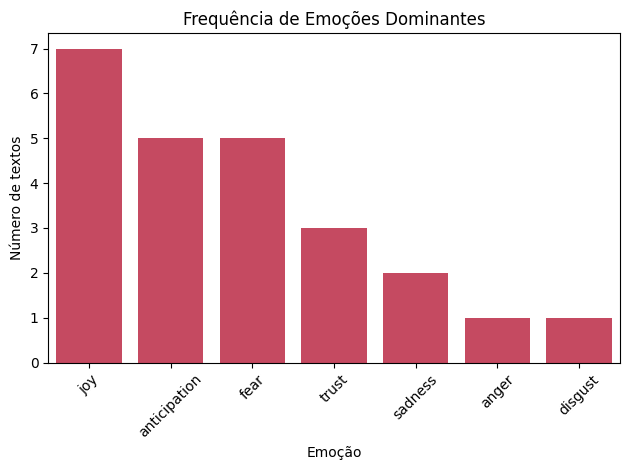

In [12]:
 # Cria um gráfico de barras com contagem
sns.countplot(
    x='sentiment',
    data=df,
    order=df['sentiment'].value_counts().index,  # Ordena as barras pela frequência de cada emoção
    color='#D93654'
)

# Construção do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()                             # Ajusta o layout para evitar que os textos fiquem cortados
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    A discografia possui alto teor de alegria.
</div>

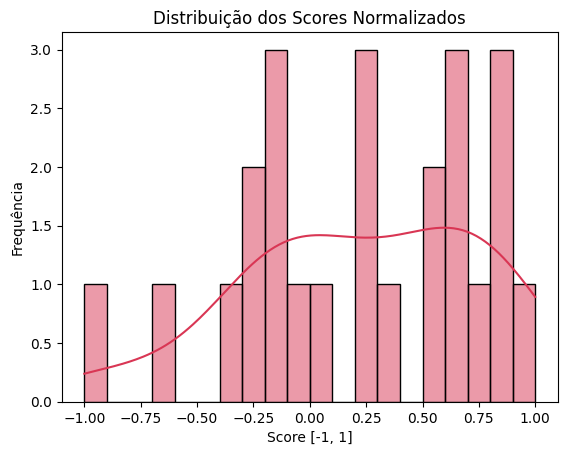

In [13]:
sns.histplot(df['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    Os scores estão bem concentrados na polaridade neutra do gráfico (próxima de 0).
</div>

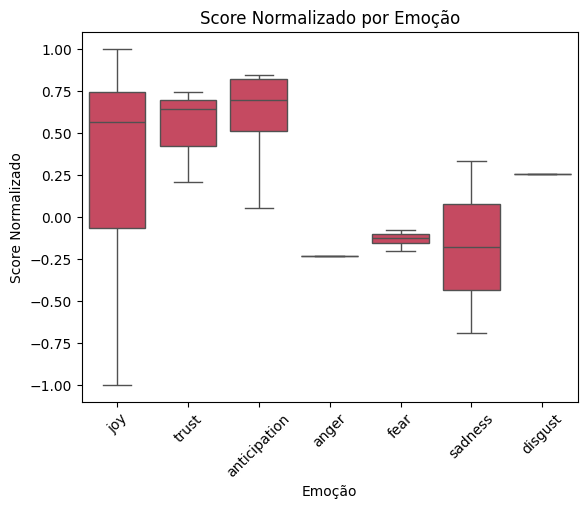

In [14]:
sns.boxplot(x='sentiment', y='score', data=df, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

Esse gráfico boxplot compara os scores normalizados de sentimento para cada emoção.

- O **centro da caixa** é a **mediana** (valor do meio).
- As **caixas** mostram o intervalo interquartílico (de 25% a 75% dos dados).
- Os **"bigodes"** (linhas fora das caixas) mostram a dispersão.
- Os **pontos fora do padrão** são **outliers**.



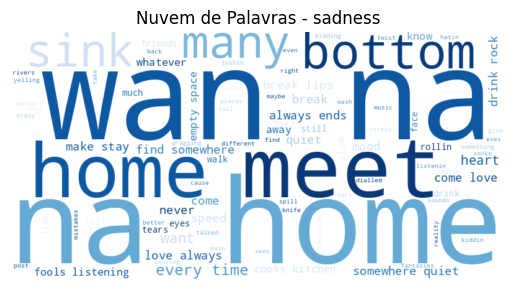

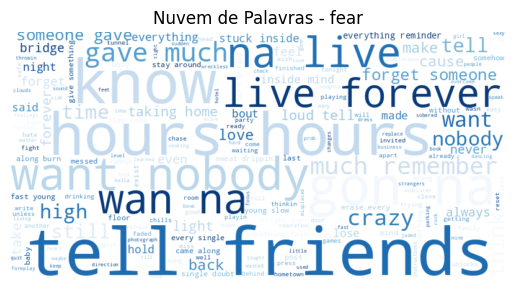

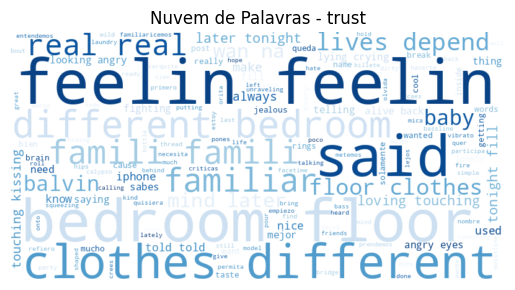

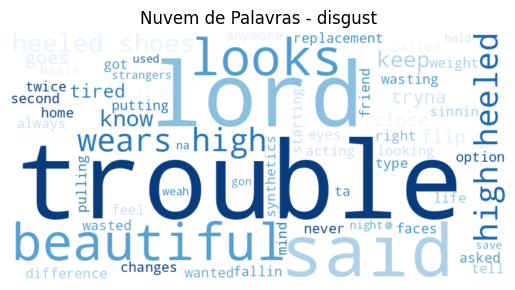

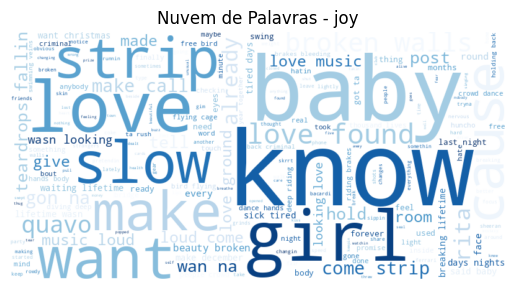

Nenhuma palavra encontrada para a emoção: surprise


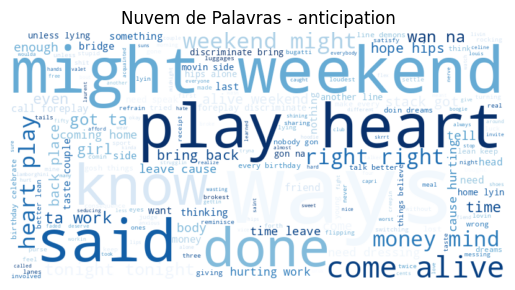

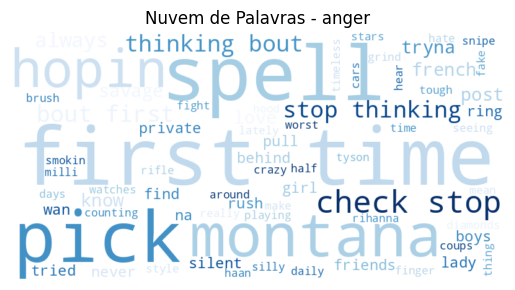

In [15]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []
    for text in df[df['sentiment'] == emotion]['lyrics']:
        words.extend(word_tokenize(text.lower()))

    # Verificar se há palavras antes de gerar a nuvem
    if not words:
        print(f"Nenhuma palavra encontrada para a emoção: {emotion}")
        continue

    # Gerar a nuvem de palavras com fundo branco e tons de azul
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',  # Fundo branco
        colormap='Blues'  # Paleta de tons de azul
    ).generate(' '.join(words))

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - {emotion}')
    plt.show()

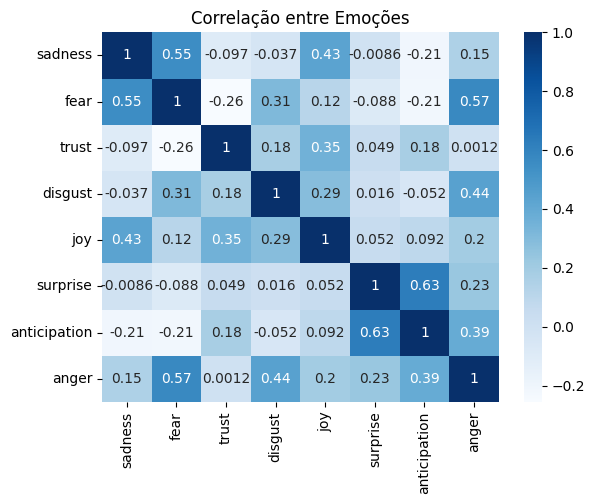

In [16]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

## Análise do EP First Time

*First Time* é o primeiro *extended play* do cantor inglês Liam Payne . Produzido principalmente por Di Genius , Burns , Jason Gill, Steve Fitzmaurice , Cutfather , MdL e Sly, foi lançado em 24 de agosto de 2018 pela *Capitol Records* . Sua faixa-título , que conta com uma participação especial do artista americano de hip hop French Montana , foi lançada no mesmo dia que seu *single * principal.

Mais informações em: https://en.wikipedia.org/wiki/First_Time_(EP)

In [19]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_songs = df[~df['Album'].isin(['LP1','LP2'])]

# Exibindo o DataFrame filtrado
df_songs

title                                             lyrics  \
6      First Time  french montana montana know hear haan french m...   
10   Depend on It  used loving touching kissing like lives depend...   
12           Slow  though done turn blind tell goodnight cause me...   
13      Teardrops  teardrops fallin down face cause know love whe...   
14  Home with You  walk walk dragging talked smoke spill about fr...   

         Album  release_year  Word Count     score sentiment   filter  
6   First Time          2018         230 -0.230769     anger  intenso  
10  First Time          2018         130  0.743590     trust  intenso  
12  First Time          2018         154  0.205128       joy   neutro  
13        LP2*          2024         146 -0.333333       joy  intenso  
14  First Time          2018         149 -0.692308   sadness  intenso

In [20]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_songs['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 734 palavras no dataset de letra.
Existem 211 palavras únicas no dataset de letras.


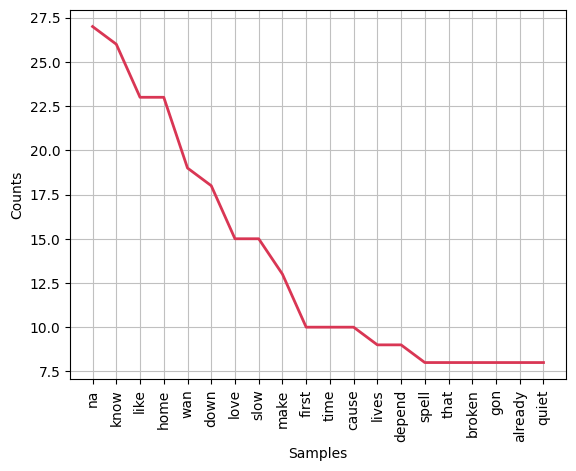

In [21]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

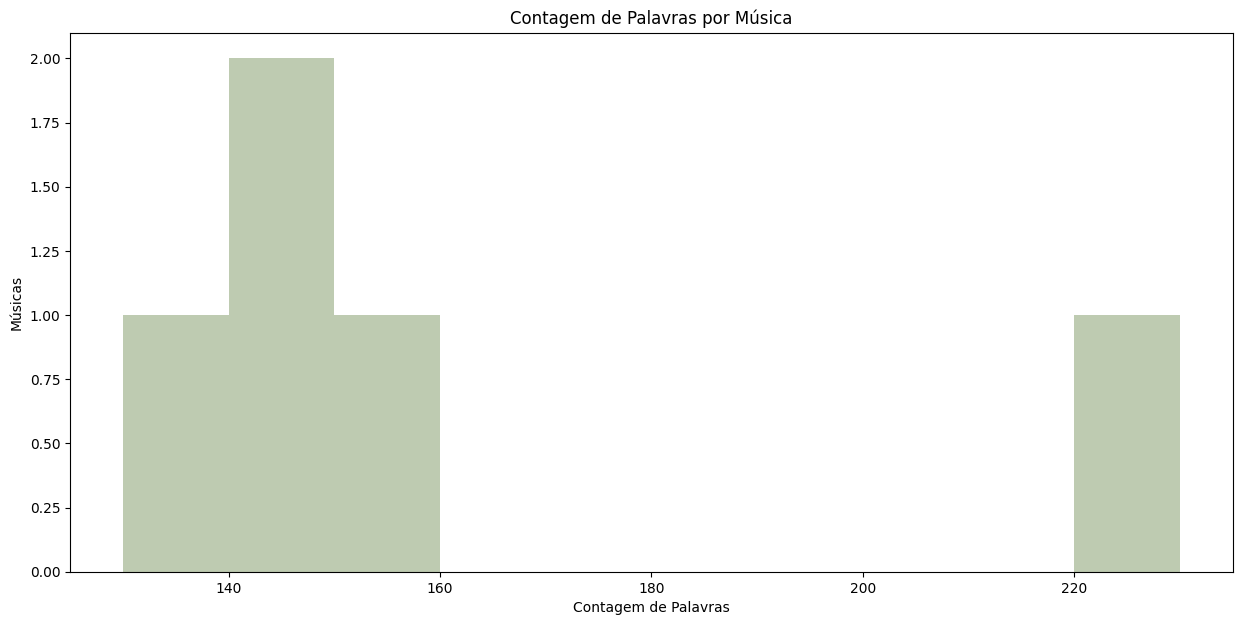

In [22]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_reflection
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_songs['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

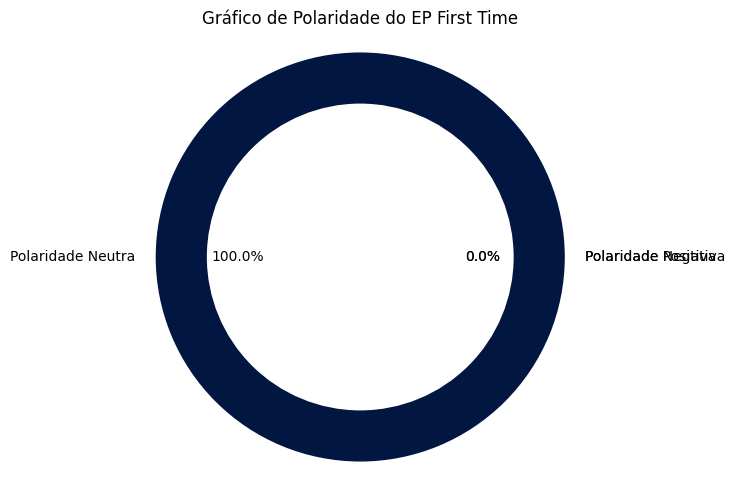

In [24]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_songs['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_songs['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do EP First Time')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta apenas polaridade neutra.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-25-7b5b8ab66772>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_songs['lyrics'] = df_songs['lyrics'].fillna('')  # Substitui valores nulos por string vazia


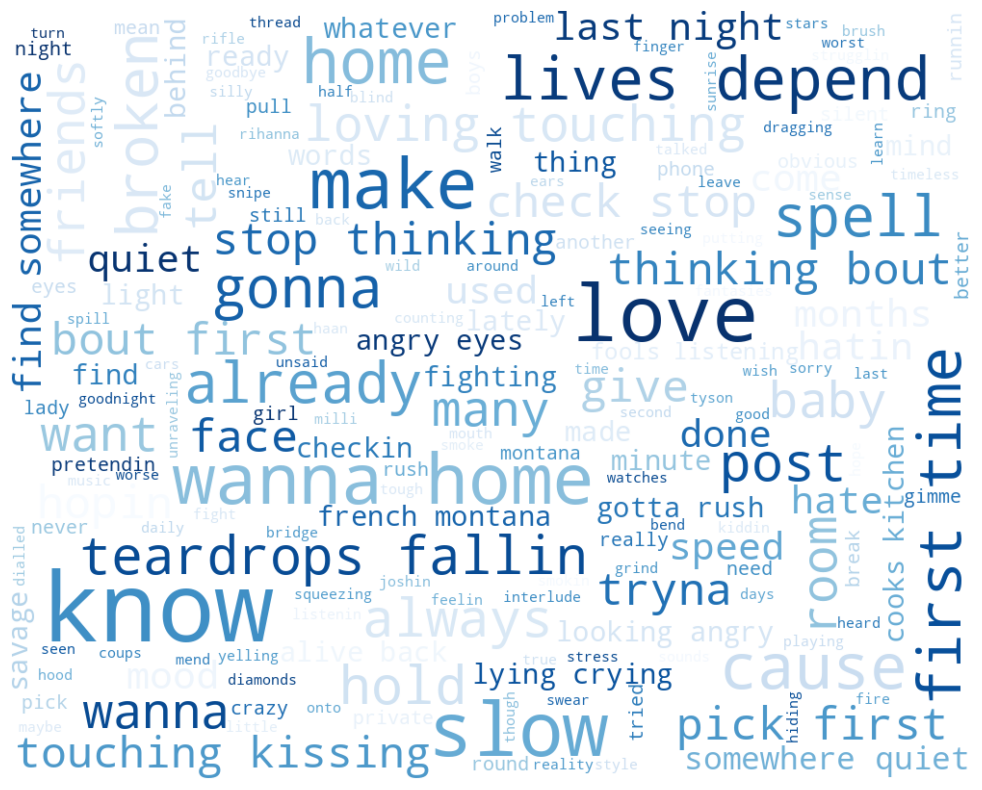

In [25]:
# Exibir os nomes das colunas do DataFrame
print(df_songs.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_songs.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_songs['lyrics'] = df_songs['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_songs['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

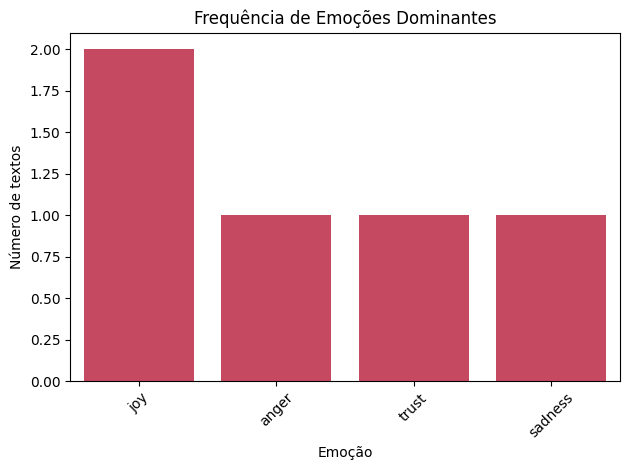

In [26]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_songs,
    order=df_songs['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

# Gerando o gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout() #Ajuste automático
plt.show()

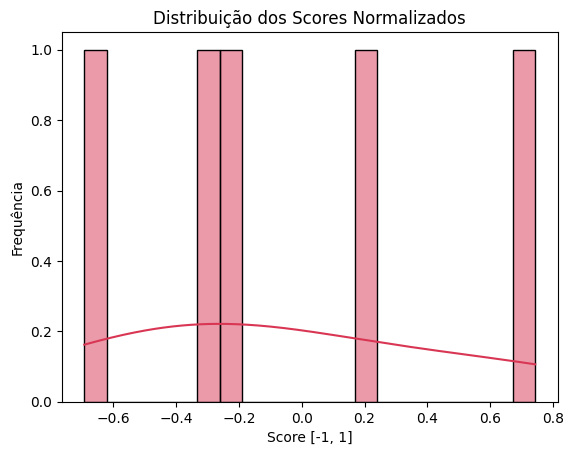

In [27]:
## Construção do Histograma
sns.histplot(df_songs['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

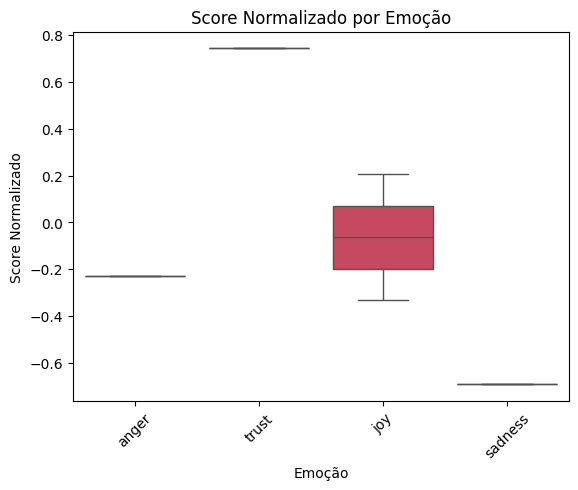

In [28]:
sns.boxplot(x='sentiment', y='score', data=df_songs, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

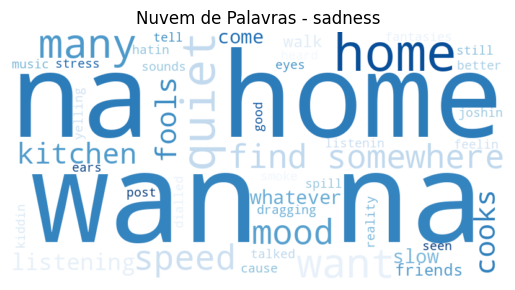

Nenhuma letra encontrada para a emoção 'fear'.


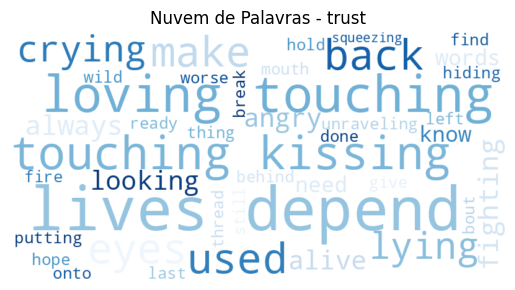

Nenhuma letra encontrada para a emoção 'disgust'.


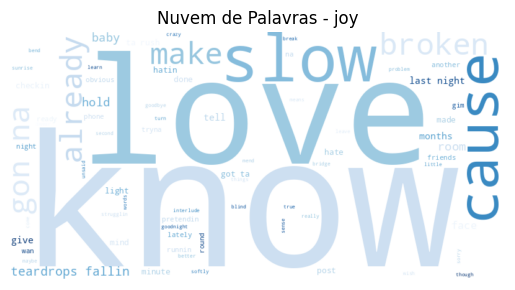

Nenhuma letra encontrada para a emoção 'surprise'.
Nenhuma letra encontrada para a emoção 'anticipation'.


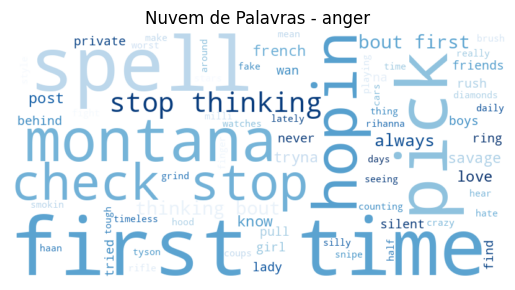

In [29]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_songs[df_songs['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

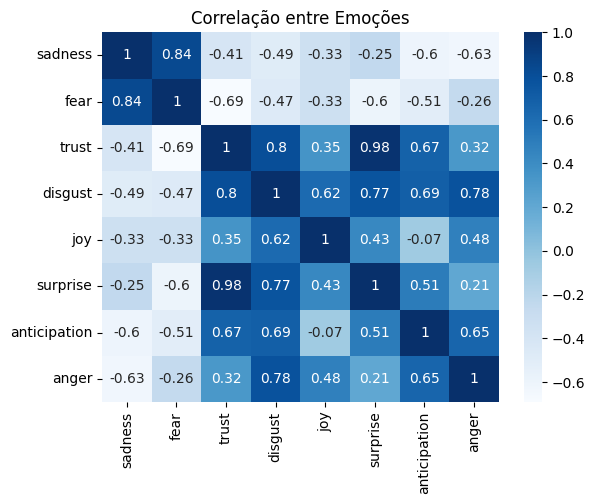

In [30]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_songs['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

### Análise do Álbum LP1

LP1 é o álbum de estreia do cantor inglês Liam Payne. O álbum foi lançado em 6 de dezembro de 2019 pela *Capitol Records*. É o único álbum de estúdio lançado em carreira solo por Payne, até sua morte em 16 de outubro de 2024.

Mais informações em: https://pt.wikipedia.org/wiki/LP1_(%C3%A1lbum)

In [31]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_lp = df[df['Album'].isin(['LP1'])]

# Exibindo o DataFrame filtrado
df_lp

title  \
0              Strip That Down   
1                      For You   
2                     Familiar   
3                    Both Ways   
4                Bedroom Floor   
5                  Stack It Up   
7   All I Want (For Christmas)   
8                 Live Forever   
9                   Rude Hours   
11                    Remember   
15           Tell Your Friends   
16            Heart Meet Break   
17                     Weekend   
18                  Say It All   
19              Hips Don’t Lie   
20                  Hurting Me   
21                     Trouble   
22                 Nobody Else   
23                        Down   

                                               lyrics Album  release_year  \
0   quavo huncho quavo know takin time keepin self...   LP1          2017   
1   rita eyes alive inside beautiful something unu...   LP1          2018   
2   balvin balvin balvin simple your hips roll cal...   LP1          2018   
3   girl like ways like taste couple more call for...   LP1          2019   
4   baby heard talking lately telling friends much...   LP1          2017   
5   wanna broke wanna livin tryna club wanna want ...   LP1          2019   
7   tell wrong singing christmas songs instead sho...   LP1          2019   
8   jaded faded self medicated know waiting broken...   LP1          2019   
9   meet parking might idea prob your quit naughty...   LP1          2019   
11  love someone love someone much makes hate them...   LP1          2019   
15  defend reputation girl even make sound hold do...   LP1          2019   
16  heart meet break lips meet drink rock meet bot...   LP1          2019   
17  said wrong meant right would know faded right ...   LP1          2019   
18  want want girl know want know what want leaves...   LP1          2019   
19  like shining eyes rocking back forth rocking b...   LP1          2019   
20  know play heart baby last night found receipt ...   LP1          2019   
21  never wanted tired wasted wasting life basis l...   LP1          2019   
22  wanna that your body hella wanna know taking t...   LP1          2019   
23  take time take girl know intoxicated touch mov...   LP1          2019   

    Word Count     score     sentiment   filter  
0          354  0.641026           joy  intenso  
1          166  1.000000           joy  intenso  
2          233  0.641026         trust  intenso  
3          232  0.692308  anticipation  intenso  
4          194  0.205128         trust   neutro  
5          181  0.820513  anticipation  intenso  
7          123  0.564103           joy  intenso  
8          200 -0.205128          fear  intenso  
9          189 -0.076923          fear  intenso  
11         168 -0.102564          fear  intenso  
15         212 -0.128205          fear  intenso  
16         188  0.333333       sadness  intenso  
17         180  0.846154  anticipation  intenso  
18         195 -1.000000           joy  intenso  
19         137  0.512821  anticipation  intenso  
20         158  0.051282  anticipation  intenso  
21         144  0.256410       disgust  intenso  
22         159 -0.153846          fear  intenso  
23         108  0.846154           joy  intenso

In [32]:
# Lista de palavras indesejadas presentes na discografia
indesejadas = ['yeah','na','quavo']

# Remove palavras indesejadas, e salva de volta como um texto longo
df_lp['lyrics'] = df_lp['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_lp['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 3187 palavras no dataset de letra.
Existem 666 palavras únicas no dataset de letras.


<ipython-input-32-dbe546762bae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lp['lyrics'] = df_lp['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))


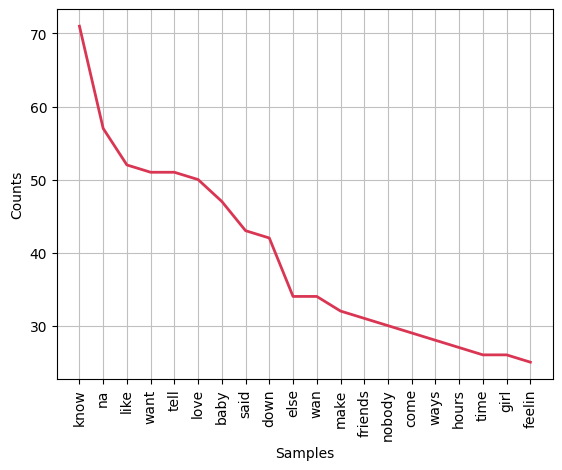

In [33]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

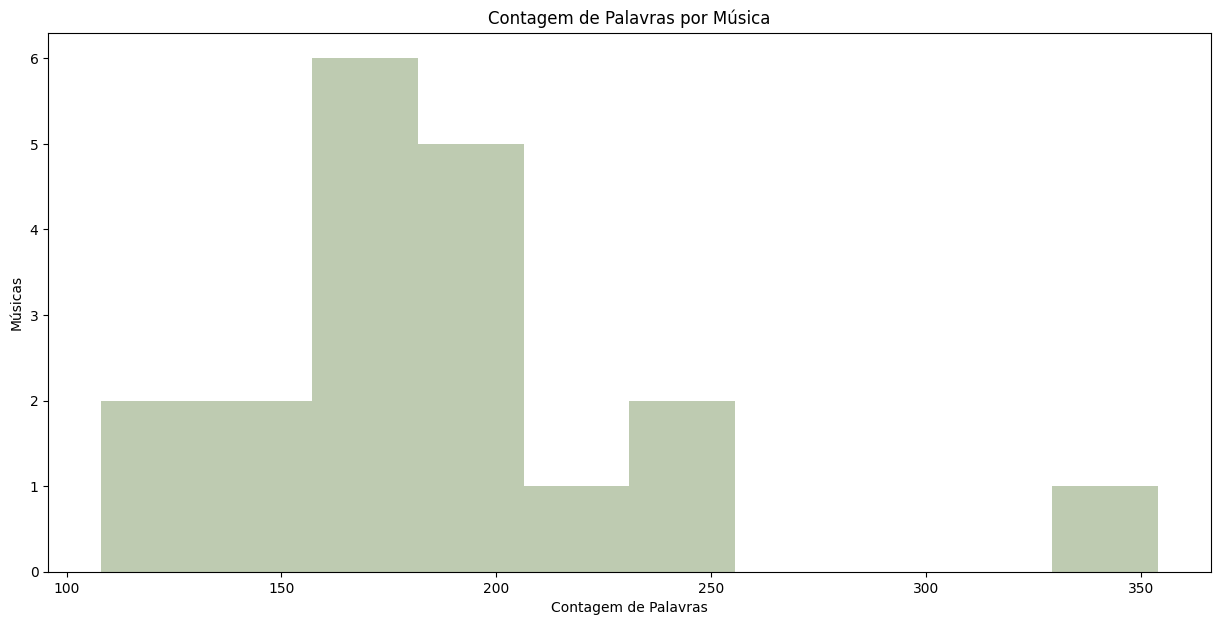

In [35]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_dopamine
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_lp['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

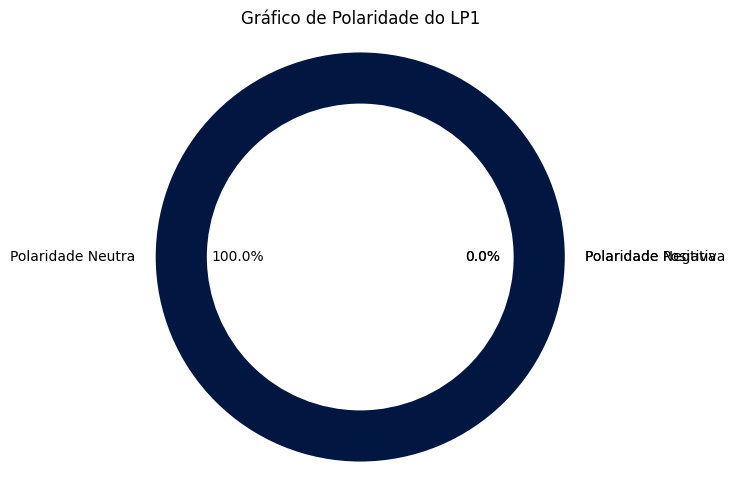

In [36]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_lp['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_lp['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do LP1')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    O álbum apresenta apenas polaridade neutra, indicando ausência de mudança nas composições e estratégias do artista.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-37-0f95e7efafe0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lp['lyrics'] = df_lp['lyrics'].fillna('')  # Substitui valores nulos por string vazia


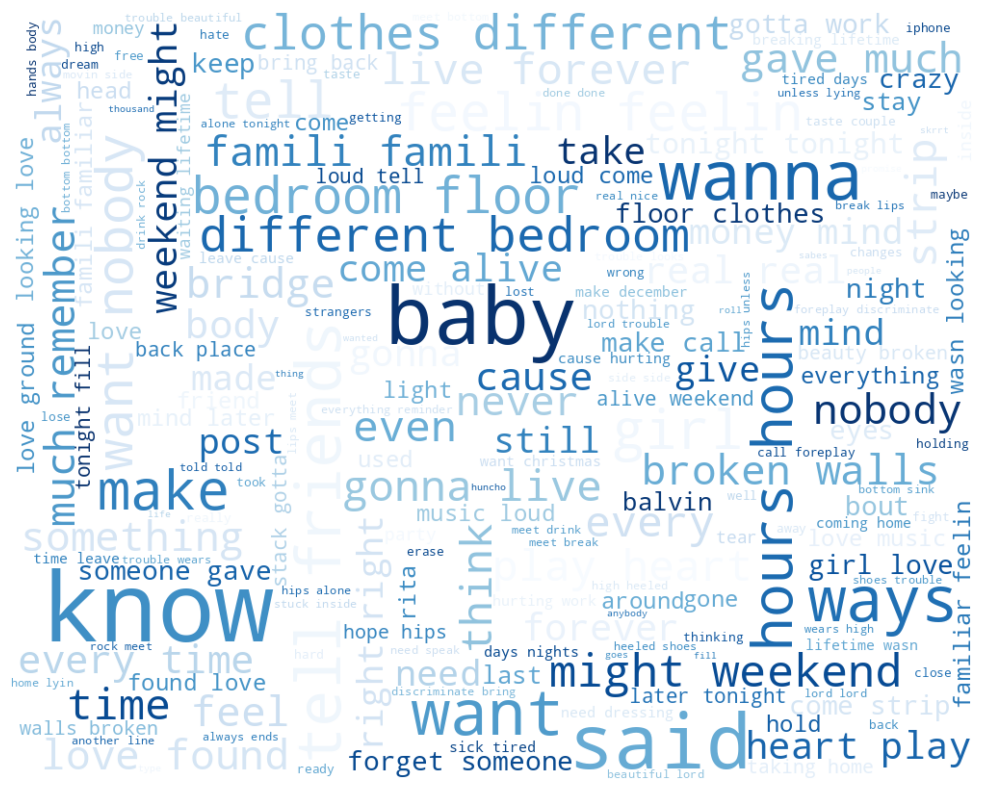

In [37]:
# Exibir os nomes das colunas do DataFrame
print(df_lp.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_lp.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_lp['lyrics'] = df_lp['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_lp['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

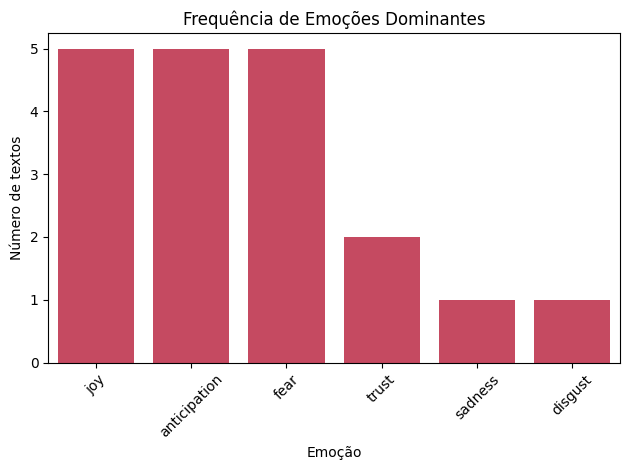

In [38]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_lp,
    order=df_lp['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

#Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    Apenas três sentimentos: joy, fear e anticipation.
</div>


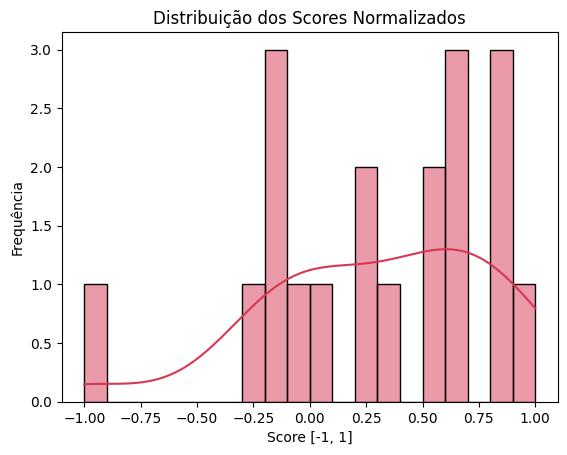

In [39]:
# Gerando o Histograma
sns.histplot(df_lp['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

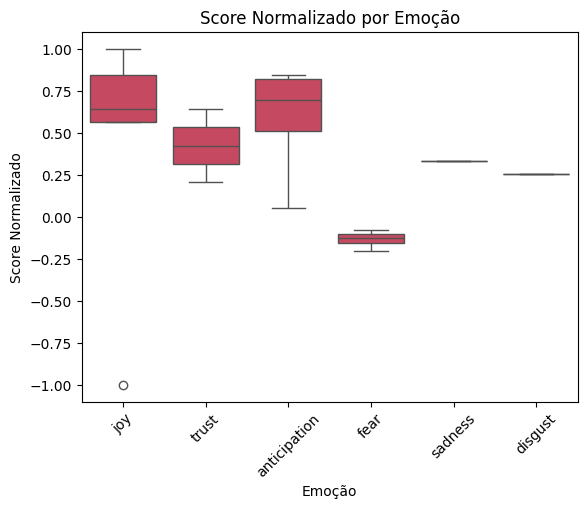

In [40]:
# Gerando o Boxplot
sns.boxplot(x='sentiment', y='score', data=df_lp, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

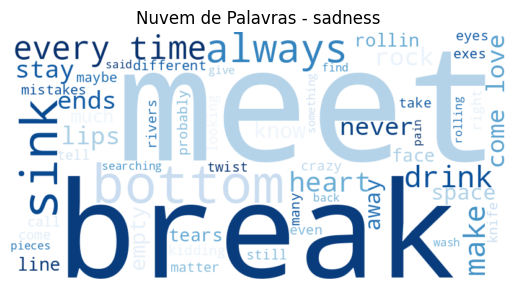

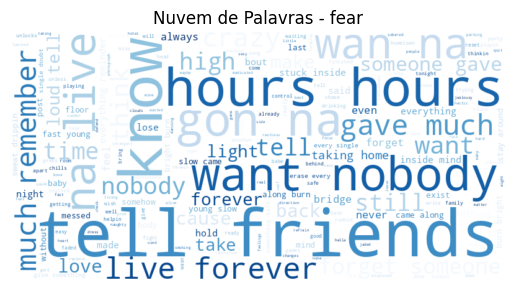

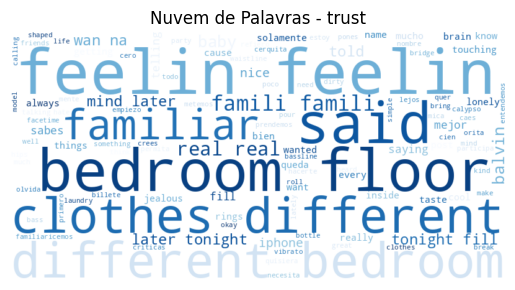

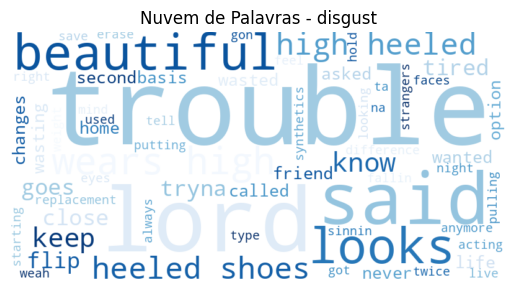

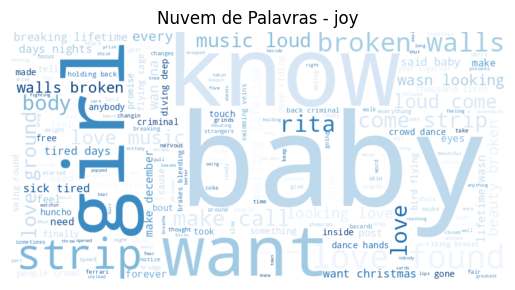

Nenhuma letra encontrada para a emoção 'surprise'.


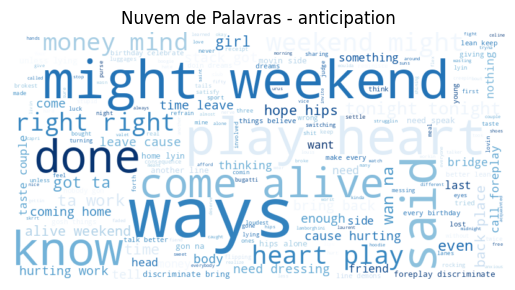

Nenhuma letra encontrada para a emoção 'anger'.


In [41]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_lp[df_lp['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

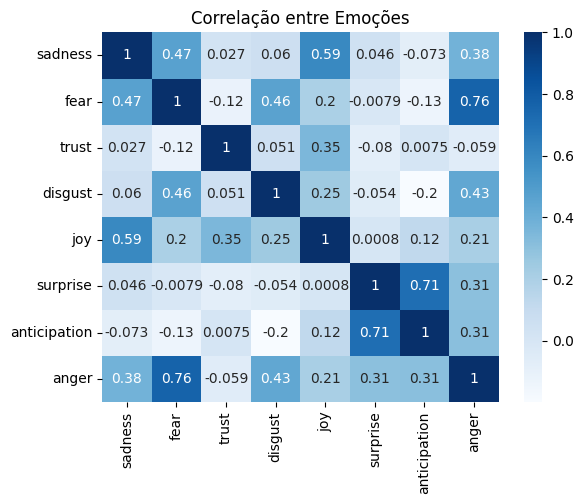

In [42]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_lp['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

### Análise da Música Teardrops

É uma canção do cantor inglês Liam Payne , lançada em 1 de março de 2024, pela *Capitol* e *Hampton Records*. Foi lançada como o primeiro *single* de um segundo álbum de estúdio então planejado. A canção foi escrita por Payne, JC Chasez e Jamie Scott.

Mais informações em: https://en.wikipedia.org/wiki/Teardrops_(Liam_Payne_song)

In [43]:
# Filtrando o DataFrame para excluir músicas dos álbuns Reflection, 7/27 e Fifth Harmony
df_t = df_original_2[~df_original_2['Album'].isin(['First Time', 'LP1'])]

# Exibindo o DataFrame filtrado
df_t

title                                             lyrics Album  \
13  Teardrops  teardrops fallin down face cause know love whe...  LP2*   

    release_year  Word Count     score sentiment   filter  
13          2024         146 -0.333333       joy  intenso

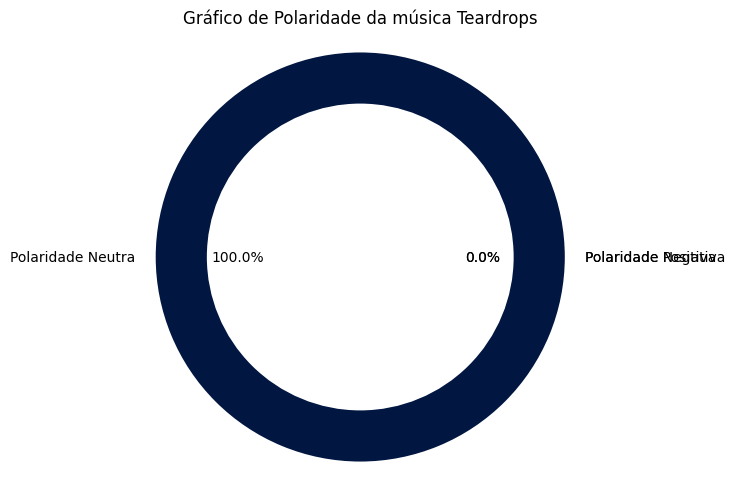

In [44]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_songs['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_songs['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade da música Teardrops')
plt.axis('equal')
plt.show()